In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [55]:
import yfinance as yf
start = '2010-01-01'
end = '2022-12-31'

df = yf.download('AAPL',start,end)

[*********************100%%**********************]  1 of 1 completed


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [57]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [58]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127045,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307251,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207794,77034200


In [59]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [60]:
df = df.drop(['Date'], axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
3,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
4,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


Text(0, 0.5, 'Closing Price')

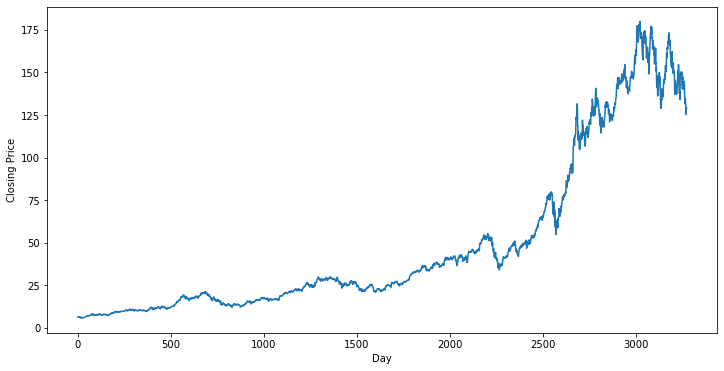

In [61]:
plt.figure(figsize = (12,6))
plt.plot(df['Adj Close'])
plt.xlabel('Day')
plt.ylabel('Closing Price')

In [62]:
ma100 = df['Adj Close'].rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    149.511274
3268    149.160477
3269    148.772285
3270    148.424361
3271    148.079122
Name: Adj Close, Length: 3272, dtype: float64

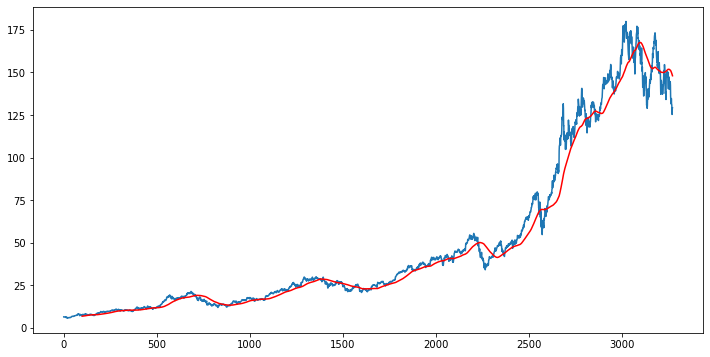

In [63]:
plt.figure(figsize = (12,6))
plt.plot(df['Adj Close'])
plt.plot(ma100,'red')

In [64]:
ma200 = df['Adj Close'].rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.924020
3268    150.804671
3269    150.685827
3270    150.562608
3271    150.418706
Name: Adj Close, Length: 3272, dtype: float64

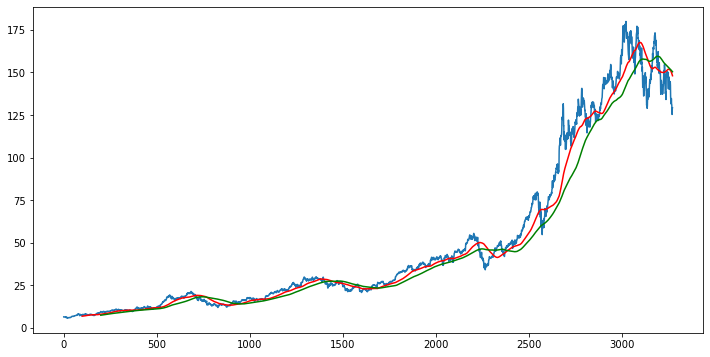

In [65]:
plt.figure(figsize = (12,6))
plt.plot(df['Adj Close'])
plt.plot(ma100,'red')
plt.plot(ma200, 'green')

In [66]:
df.shape

(3272, 6)

In [67]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Adj Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Adj Close'][int(len(df)*0.70):])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [68]:
data_training.head()

,Adj Close
0,6.478998
1,6.490199
2,6.386965
3,6.375158
4,6.417540


In [69]:
data_training.tail()

,Adj Close
2285,39.956928
2286,41.091908
2287,41.794960
2288,41.809372
2289,41.017513


In [70]:
data_testing.head()

,Adj Close
2290,41.065716
2291,40.829552
2292,41.181389
2293,41.010281
2294,41.159695


In [71]:
data_testing.tail()

,Adj Close
3267,131.127045
3268,129.307251
3269,125.339417
3270,128.889572
3271,129.207794


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [73]:
data_training_array = scaler.fit_transform(data_training)
data_training_array[101]

array([0.03950802])

In [74]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train ,y_train = np.array(x_train), np.array(y_train)

In [75]:
x_train.shape

(2190, 100, 1)

In [76]:
x_train

array([[[0.01338263],
        [0.0136081 ],
        [0.01153003],
        ...,
        [0.03334077],
        [0.03240227],
        [0.03172581]],

       [[0.0136081 ],
        [0.01153003],
        [0.01129236],
        ...,
        [0.03240227],
        [0.03172581],
        [0.03735681]],

       [[0.01153003],
        [0.01129236],
        [0.01214549],
        ...,
        [0.03172581],
        [0.03735681],
        [0.03950802]],

       ...,

       [[0.96043416],
        [0.94705286],
        [0.97275632],
        ...,
        [0.68689411],
        [0.68728066],
        [0.71012736]],

       [[0.94705286],
        [0.97275632],
        [0.96038586],
        ...,
        [0.68728066],
        [0.71012736],
        [0.72427954]],

       [[0.97275632],
        [0.96038586],
        [0.93169817],
        ...,
        [0.71012736],
        [0.72427954],
        [0.72456965]]])

In [77]:
y_train

array([0.03735681, 0.03950802, 0.04191515, ..., 0.72427954, 0.72456965,
       0.70862984])

In [78]:
y_train.shape

(2190,)

## ML Model

In [79]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [80]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [82]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
69/69 [==============================] - 13s 125ms/step - loss: 0.0375
Epoch 2/50
69/69 [==============================] - 9s 125ms/step - loss: 0.0072
Epoch 3/50
69/69 [==============================] - 9s 128ms/step - loss: 0.0057
Epoch 4/50
69/69 [==============================] - 8s 123ms/step - loss: 0.0049
Epoch 5/50
69/69 [==============================] - 8s 122ms/step - loss: 0.0048
Epoch 6/50
69/69 [==============================] - 8s 123ms/step - loss: 0.0042
Epoch 7/50
69/69 [==============================] - 8s 122ms/step - loss: 0.0044
Epoch 8/50
69/69 [==============================] - 8s 122ms/step - loss: 0.0047
Epoch 9/50
69/69 [==============================] - 8s 122ms/step - loss: 0.0037
Epoch 10/50
69/69 [==============================] - 9s 126ms/step - loss: 0.0038
Epoch 11/50
69/69 [==============================] - 9s 124ms/step - loss: 0.0034
Epoch 12/50
69/69 [==============================] - 9s 127ms/step - loss: 0.0037
Epoch 13/50
69/69 [=====

In [83]:
model.save('keras_model.h5')

In [84]:
data_testing.head()

,Adj Close
2290,41.065716
2291,40.829552
2292,41.181389
2293,41.010281
2294,41.159695


In [85]:
data_training.tail(100)

,Adj Close
2190,53.524258
2191,52.099110
2192,52.185196
2193,52.216293
2194,52.613220
...,...
2285,39.956928
2286,41.091908
2287,41.794960
2288,41.809372


In [86]:
past_100_days = data_training.tail(100)

In [87]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\ANKIT SINGH\AppData\Local\Temp\ipykernel_20904\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [88]:
final_df.head()

,Adj Close
0,53.524258
1,52.099110
2,52.185196
3,52.216293
4,52.613220


In [89]:
input_data = scaler.fit_transform(final_df)

In [90]:
input_data

array([[0.13306393],
       [0.1232916 ],
       [0.1238819 ],
       ...,
       [0.62550507],
       [0.64984872],
       [0.65203079]])

In [91]:
input_data.shape

(1082, 1)

In [92]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [93]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [94]:
## Making Predictions

y_predicted = model.predict(x_test)

31/31 [==============================] - 2s 36ms/step


In [95]:
y_predicted.shape

(982, 1)

In [96]:
y_test

array([0.04763492, 0.04601552, 0.04842809, 0.04725479, 0.04827933,
       0.04765142, 0.04849414, 0.05031178, 0.04870903, 0.05186515,
       0.05394719, 0.05411241, 0.05500472, 0.05216256, 0.05516993,
       0.05662409, 0.05609542, 0.0544264 , 0.05108843, 0.05176596,
       0.06166395, 0.06498532, 0.06630733, 0.06964522, 0.0735945 ,
       0.07673412, 0.07427201, 0.07696551, 0.08841679, 0.08174098,
       0.0779239 , 0.07470165, 0.07747773, 0.07789084, 0.07992334,
       0.082055  , 0.08664872, 0.08884646, 0.0894083 , 0.09157297,
       0.09669547, 0.09570399, 0.09755475, 0.09479515, 0.09466303,
       0.09525788, 0.09529097, 0.10170238, 0.10290864, 0.10401576,
       0.10889037, 0.10836162, 0.10525511, 0.10363564, 0.10414794,
       0.09763738, 0.11391378, 0.11164994, 0.11594625, 0.11054285,
       0.10125613, 0.10132226, 0.09771994, 0.09312509, 0.07411538,
       0.07899223, 0.08274114, 0.08134772, 0.07955624, 0.06975278,
       0.07557513, 0.06923855, 0.06406316, 0.06291855, 0.06169

In [97]:
y_predicted

array([[0.1272992 ],
       [0.12860422],
       [0.13001643],
       [0.13146332],
       [0.13288105],
       [0.13422069],
       [0.13544703],
       [0.13653907],
       [0.13749114],
       [0.13830368],
       [0.13898925],
       [0.13957101],
       [0.14007354],
       [0.14052027],
       [0.14092192],
       [0.14129075],
       [0.14164145],
       [0.1419838 ],
       [0.14231794],
       [0.14263184],
       [0.14291334],
       [0.14318076],
       [0.14347154],
       [0.14382309],
       [0.14427319],
       [0.14486109],
       [0.14562137],
       [0.14655639],
       [0.14765446],
       [0.14893857],
       [0.15039393],
       [0.1519635 ],
       [0.15356591],
       [0.15513013],
       [0.15660053],
       [0.157944  ],
       [0.15914997],
       [0.16023637],
       [0.1612374 ],
       [0.16218682],
       [0.16311745],
       [0.16407108],
       [0.16507189],
       [0.1661322 ],
       [0.16723794],
       [0.16836078],
       [0.16946962],
       [0.170

In [98]:
scaler.scale_

array([0.00685706])

In [99]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [100]:
print(y_predicted.shape)
print(y_test.shape)

(982, 1)
(982,)


In [101]:
y_test = y_test.reshape(982,1)
y_ptedicted = y_predicted.reshape(982,1)

In [102]:
import pandas as pd

# Assuming y_test and y_predicted are arrays or Series
y_test = y_test.flatten() if isinstance(y_test, (pd.Series, np.ndarray)) else y_test
y_predicted = y_predicted.flatten() if isinstance(y_predicted, (pd.Series, np.ndarray)) else y_predicted

# Create the DataFrame
dfr = pd.DataFrame({'Close': y_test, 'Predictions': y_predicted})

In [103]:
print(dfr)

         Close  Predictions
0     6.976725    18.644548
1     6.739545    18.835684
2     7.092896    19.042521
3     6.921051    19.254435
4     7.071108    19.462080
..         ...          ...
977  97.425514   105.358521
978  95.597892   104.177811
979  91.612987   103.005394
980  95.178416   101.811035
981  95.498007   100.634262

[982 rows x 2 columns]


In [104]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.971500548155168

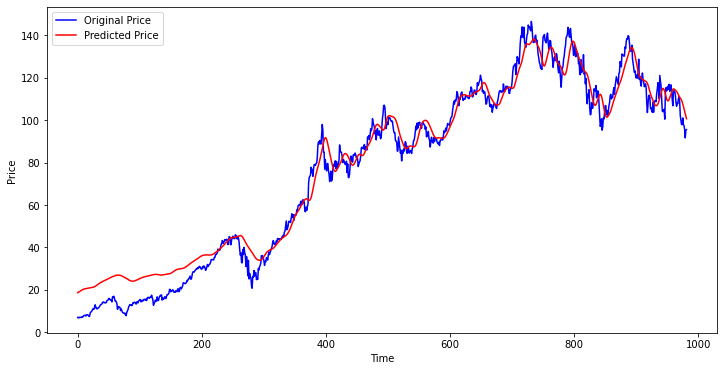

In [105]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()